In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load datasets into pandas dataframe

#content data import 
df_content = pd.read_csv("data/content.csv")

#location data import
df_location = pd.read_csv("data/location.csv")

#Profile data import
df_profile = pd.read_csv("data/profile.csv")

#Reactions data import
df_reactions = pd.read_csv("data/reactions.csv")

#ReactionType import
df_reaction_type = pd.read_csv("data/reactiontypes.csv")

#Users data import
df_user = pd.read_csv("data/user.csv")
df_user.head()

,Unnamed: 0,User ID,Name,Email
0,0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw
1,1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com
2,2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com
3,3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com
4,4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com


In [3]:
#overview of datasets
df_content.shape
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [4]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   User ID     500 non-null    object
 2   Address     500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [5]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   User ID     500 non-null    object
 2   Interests   500 non-null    object
 3   Age         500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [6]:
# display summmary statistics for profile data
df_profile.describe()

,Unnamed: 0,Age
count,500.000000,500.000000
mean,249.500000,22.290000
std,144.481833,13.154619
min,0.000000,0.000000
25%,124.750000,10.750000
50%,249.500000,23.000000
75%,374.250000,34.000000
max,499.000000,44.000000


In [7]:
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [8]:
df_reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [9]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   User ID     500 non-null    object
 2   Name        500 non-null    object
 3   Email       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


### Quality Issues;

`Content`
- Some category values in quotes
- inconsistent casing for category values. lowercase sometimes, capitalized sometimes
- missing url for some post.
- type for category is string instead of category

`Profile`
- invalid interest values [0], [0,1], [0,1,2] for users
- interest formatted as list instead of string
- Age values below minimal requirement of 13

`Reactions`
- missing userid and type values

`User`
- invalid email for some users.

### Tidiness Issues
- Index column part of the all the datasets

### Cleaning Task; Missing values

In [10]:
#generate urls for records with missing post url in content table
df_content_clean = df_content.copy()

In [11]:
domain = 'https://socialbuzz.cdn.com/content/storage/'

def create_url(post):
    post = post.astype('str')
    post_attributes = list(post)
    if post_attributes[5] == 'nan':
        return domain + post[1]
    return post[5]
df_content_clean['URL'] = df_content_clean.apply(create_url, axis=1)

In [12]:
#test 
df_content_clean['URL'].isna().sum()

0

In [13]:
#Reactions - drop record with missing type
df_reactions_clean = df_reactions.copy()
type_index = df_reactions_clean[df_reactions_clean['Type'].isna()].index
df_reactions_clean.drop(type_index, inplace=True)

In [14]:
#Test
df_reactions_clean.Type.isna().sum()

0

In [15]:
#Reactions - drop records with missing user ID
user_index = df_reactions_clean[df_reactions_clean['User ID'].isna()].index
df_reactions_clean.drop(user_index, inplace=True)

In [16]:
#Test 
df_reactions_clean['User ID'].isna().sum()

0

In [17]:
# merge content and rection and reaction type tabels
# merge reaction and reaction type datasets
df_reaction_type_clean = df_reaction_type[['Type','Sentiment', 'Score']]
df_reactions_clean = pd.merge(df_reactions_clean, df_reaction_type_clean, on='Type', how='inner')
df_reactions_clean.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
2,35,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0
3,52,9f737e0a-3cdd-4d29-9d24-753f4e3be810,8b49caad-bcc5-43de-bf40-34a66ff8805c,disgust,2021-03-28 21:15:26,negative,0
4,88,230c4e4d-70c3-461d-b42c-ec09396efb3f,ef147ea5-9696-44d5-b6c2-a43f62fd8ce2,disgust,2020-08-04 05:40:33,negative,0


In [18]:
# merge content and reactions
df_content_clean = df_content_clean[['Content ID','Type', 'Category', 'URL']]
df_reactions_clean.head()
df_reactions_clean = pd.merge(df_reactions_clean, df_content_clean, on=['Content ID'], how='inner')

In [19]:
# merge user and profile dataset
df_profile_clean = df_profile[['User ID', 'Age']]
df_user_clean = df_user.copy()
df_user_clean = pd.merge(df_user_clean, df_profile_clean, on='User ID', how='inner')
df_user_clean.head()

,Unnamed: 0,User ID,Name,Email,Age
0,0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,41
1,1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,23
2,2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,25
3,3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com,2
4,4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com,44


### Cleaning Task; Quality Issues

In [20]:
# content - remove quotes from category values
df_reactions_clean['Category'] = df_reactions_clean['Category'].str.replace('"', '')

In [21]:
# test
df_reactions_clean['Category'].str.contains('"').sum()

0

In [22]:
# content - change case of all category values to lower
df_reactions_clean['Category'] = df_reactions_clean['Category'].str.lower()
df_reactions_clean.head()

,Unnamed: 0,Content ID,User ID,Type_x,Datetime,Sentiment,Score,Type_y,Category,URL
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
1,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
2,35,97522e57-d9ab-4bd6-97bf-c24d952602d2,13c06e7e-833d-47eb-a790-5e09ccfd8d2c,disgust,2021-04-09 02:46:20,negative,0,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
3,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
4,38,97522e57-d9ab-4bd6-97bf-c24d952602d2,69532ce2-1ffe-4187-8042-0230d115b24e,dislike,2020-11-09 02:49:59,negative,10,photo,studying,https://socialbuzz.cdn.com/content/storage/975...


In [23]:
# content - convert Category variable from string to category type
df_reactions_clean['Category'] = df_reactions_clean['Category'].astype('category')

In [24]:
# test
df_reactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22534 entries, 0 to 22533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  22534 non-null  int64   
 1   Content ID  22534 non-null  object  
 2   User ID     22534 non-null  object  
 3   Type_x      22534 non-null  object  
 4   Datetime    22534 non-null  object  
 5   Sentiment   22534 non-null  object  
 6   Score       22534 non-null  int64   
 7   Type_y      22534 non-null  object  
 8   Category    22534 non-null  category
 9   URL         22534 non-null  object  
dtypes: category(1), int64(2), object(7)
memory usage: 1.7+ MB


In [25]:
# user - drop users with age less than 13
age_index = df_user_clean[df_user_clean['Age'] < 13].index
df_user_clean.drop(age_index, inplace=True)

In [26]:
# test 
(df_user_clean['Age'] < 13).sum()

0

In [27]:
# user - format emails for users with invalid emails
df_user_clean['Email'] = df_user_clean['Email'].apply(lambda x: x[:2]+'@gmail.com')

In [28]:
# test
(~df_user_clean['Email'].str.contains('@')).sum()

0

In [29]:
# merge reaction and user dataset
df_user_reactions = pd.merge(df_reactions_clean, df_user_clean, on='User ID', how='inner')
df_user_reactions.head()

,Unnamed: 0_x,Content ID,User ID,Type_x,Datetime,Sentiment,Score,Type_y,Category,URL,Unnamed: 0_y,Name,Email,Age
0,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,449,Racheal Hart,RH@gmail.com,17
1,50,9f737e0a-3cdd-4d29-9d24-753f4e3be810,34e8add9-0206-47fd-a501-037b994650a2,scared,2021-02-11 04:53:56,negative,15,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...,449,Racheal Hart,RH@gmail.com,17
2,331,81abd65a-3b76-4574-a0a7-db6bf7184ae2,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-09-28 08:49:01,positive,75,video,food,https://socialbuzz.cdn.com/content/storage/81a...,449,Racheal Hart,RH@gmail.com,17
3,758,2920dccb-e06f-49fc-8049-b6d4164dfe84,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-10-07 13:22:10,positive,75,GIF,veganism,https://socialbuzz.cdn.com/content/storage/292...,449,Racheal Hart,RH@gmail.com,17
4,839,74718bbf-e5a3-442f-8ca2-4a3428757fc1,34e8add9-0206-47fd-a501-037b994650a2,peeking,2020-12-07 07:22:43,neutral,35,video,dogs,https://socialbuzz.cdn.com/content/storage/747...,449,Racheal Hart,RH@gmail.com,17


### Cleaning Task; Tidiness Issue

In [30]:
#rename type column to reflect the datasets
df_user_reactions.rename(columns={'Type_x':'Reaction Type', 'Type_y': 'Content Type'}, inplace=True) 
df_user_reactions.head()

,Unnamed: 0_x,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category,URL,Unnamed: 0_y,Name,Email,Age
0,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying,https://socialbuzz.cdn.com/content/storage/975...,449,Racheal Hart,RH@gmail.com,17
1,50,9f737e0a-3cdd-4d29-9d24-753f4e3be810,34e8add9-0206-47fd-a501-037b994650a2,scared,2021-02-11 04:53:56,negative,15,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...,449,Racheal Hart,RH@gmail.com,17
2,331,81abd65a-3b76-4574-a0a7-db6bf7184ae2,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-09-28 08:49:01,positive,75,video,food,https://socialbuzz.cdn.com/content/storage/81a...,449,Racheal Hart,RH@gmail.com,17
3,758,2920dccb-e06f-49fc-8049-b6d4164dfe84,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-10-07 13:22:10,positive,75,GIF,veganism,https://socialbuzz.cdn.com/content/storage/292...,449,Racheal Hart,RH@gmail.com,17
4,839,74718bbf-e5a3-442f-8ca2-4a3428757fc1,34e8add9-0206-47fd-a501-037b994650a2,peeking,2020-12-07 07:22:43,neutral,35,video,dogs,https://socialbuzz.cdn.com/content/storage/747...,449,Racheal Hart,RH@gmail.com,17


In [35]:
# drop Unnamed fields from the merged dataset
df_user_reactions = df_user_reactions[['Content ID', 'User ID', 'Reaction Type', 'Datetime','Category','Content Type','Sentiment' ,'Score']]
df_user_reactions.head()

,Content ID,User ID,Reaction Type,Datetime,Category,Content Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,studying,photo,negative,0
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,34e8add9-0206-47fd-a501-037b994650a2,scared,2021-02-11 04:53:56,healthy eating,photo,negative,15
2,81abd65a-3b76-4574-a0a7-db6bf7184ae2,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-09-28 08:49:01,food,video,positive,75
3,2920dccb-e06f-49fc-8049-b6d4164dfe84,34e8add9-0206-47fd-a501-037b994650a2,super love,2020-10-07 13:22:10,veganism,GIF,positive,75
4,74718bbf-e5a3-442f-8ca2-4a3428757fc1,34e8add9-0206-47fd-a501-037b994650a2,peeking,2020-12-07 07:22:43,dogs,video,neutral,35


### Question; what is the distribution of popularity score for posts in the dataset.

<AxesSubplot:xlabel='Score', ylabel='count'>

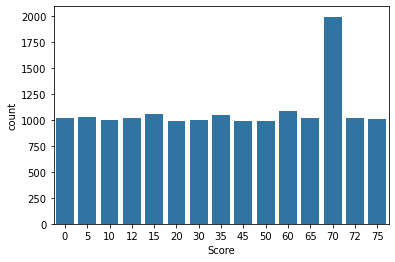

In [46]:
# score distributions
base_color = sb.color_palette()[0]
sb.countplot(data=df_user_reactions, x='Score', color=base_color)

### Insight
- most post by users has a popularity score of 70%
- almost equal no of posts has popularity scores ranging from 0-75. this does no include the popularity 70% score that can be seen for over 2k post.

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

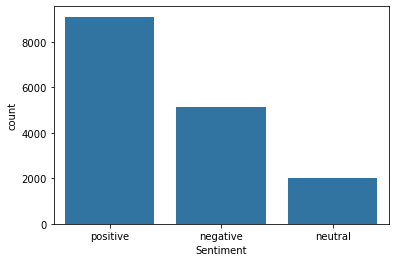

In [48]:
# distribution of categorical variables
# setiment
sent_order = df_user_reactions.Sentiment.value_counts().index
sb.countplot(data=df_user_reactions, x='Sentiment', color=base_color, order=sent_order)

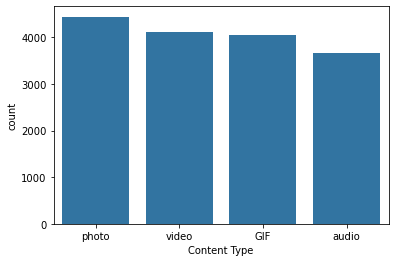

In [51]:
# distribution of content type
content_order = df_user_reactions['Content Type'].value_counts().index
sb.countplot(data=df_user_reactions, x='Content Type', color=base_color, order=content_order);

- majority of content posted by users contain photos. this is closly followed by video and GIF contents. audion contents are the least posted compared to the other content type.

<AxesSubplot:xlabel='count', ylabel='Category'>

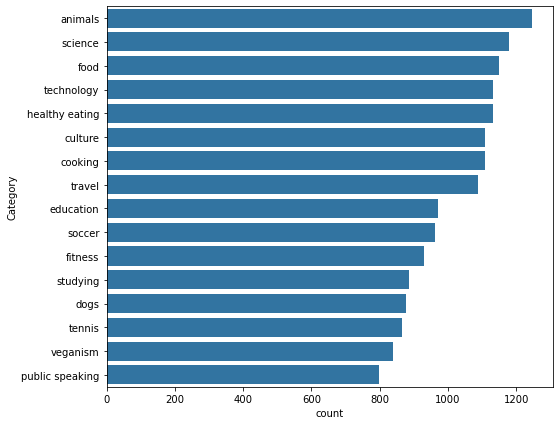

In [56]:
# distribution of content's category
plt.figure(figsize=[8,7])
cat_order = df_user_reactions.Category.value_counts().index
sb.countplot(data=df_user_reactions, y='Category', color=base_color, order=cat_order)

In [32]:
# Export cleaned datasets to csv
df_user_reactions.to_csv('user_reactions_clean.csv', index=False)`